# EDA: Phân tích hành vi tìm kiếm (Top keywords tháng 6 & 7)

**Mục tiêu:**
- Đọc kết quả ETL từ thư mục `outputs/` (top_keyword_by_month, top1_keywords, top3_keywords, keyword_classified_top30.csv).
- Thực hiện EDA: tổng quan dữ liệu, top keywords, so sánh tháng 6 vs tháng 7.
- Phân tích kết quả phân loại bởi AI (file `keyword_classified_top30.csv`).
- Lưu biểu đồ ra `outputs/charts/`

In [1]:
!pip install pandas seaborn matplotlib plotly


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.8 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.8 MB 1.4 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.8 MB 1.5 MB/s eta 0:00:06
   -------- ------------------------------- 2.1/9.8 MB 1.6 MB/s eta 0:00:05
   ---------- ----------------------------- 2.6/9.8 MB 1.8 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/9.8 MB 1.8 MB/s eta 0:00:04
   -------------- ------------------------- 3.7/9.8 MB 2.0 MB/s eta 0:00:04
   ------------------ --------------------- 4.5/9.8 MB 2.1 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.8 MB 2.2 MB/s eta 0:00:03
   ------------------------ -----

In [22]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# Thư mục dự án
BASE_DIR = Path(".")
OUTPUTS_DIR = BASE_DIR / "outputs"
CHARTS_DIR = OUTPUTS_DIR / "charts"
CHARTS_DIR.mkdir(parents=True, exist_ok=True)

# In đường dẫn để kiểm tra
print("Outputs folder:", OUTPUTS_DIR.resolve())
print("Charts folder:", CHARTS_DIR.resolve())

Outputs folder: D:\study_de\Homework\log_search_etl\outputs
Charts folder: D:\study_de\Homework\log_search_etl\outputs\charts


In [23]:
def savefig(filename: str):
    """
    Lưu biểu đồ hiện tại vào thư mục outputs/charts
    """
    filepath = CHARTS_DIR / f"{filename}.png"
    plt.savefig(filepath, dpi=300, bbox_inches="tight")
    print(f"✅ Saved chart to: {filepath}")


## Đọc dữ liệu từ thư mục `outputs/`

Cấu trúc thư mục:
- `outputs/top_keyword_by_month/` chứa file `part-00000-....csv`
- `outputs/top1_keywords/` chứa file `part-00000-....csv`
- `outputs/top3_keywords/` chứa file `part-00000-....csv`
- `outputs/keyword_classified_top30.csv` là file phân loại bởi AI


In [24]:
from typing import Optional
import glob

def read_single_csv_from_folder(folder: Path) -> pd.DataFrame:
    """Đọc 1 file CSV và báo số dòng bị bỏ qua."""
    pattern = str(folder / "*.csv")
    files = [f for f in glob.glob(pattern) if not os.path.basename(f).startswith("._") and "_SUCCESS" not in os.path.basename(f)]
    if not files:
        raise FileNotFoundError(f"Không tìm thấy file CSV trong {folder}")

    file_path = files[0]
    print(f"Đang đọc: {os.path.basename(file_path)}")

    # Đếm tổng số dòng trong file
    with open(file_path, "r", encoding="utf-8") as f:
        total_lines = sum(1 for _ in f)

    # Đọc với pandas, bỏ qua dòng lỗi
    df = pd.read_csv(file_path, on_bad_lines="skip", engine="python")

    skipped = total_lines - len(df) - 1  # Trừ 1 vì dòng header
    print(f" Đọc thành công {len(df):,} dòng. Bỏ qua khoảng {skipped:,} dòng lỗi.")

    return df

# Đọc các bảng chính (bắt lỗi nếu thiếu)
try:
    df_top_month = read_single_csv_from_folder(OUTPUTS_DIR / "top_keyword_by_month")
except Exception as e:
    print("Không đọc được top_keyword_by_month:", e)
    df_top_month = pd.DataFrame()

try:
    df_top1 = read_single_csv_from_folder(OUTPUTS_DIR / "top1_keywords")
except Exception as e:
    print("Không đọc được top1_keywords:", e)
    df_top1 = pd.DataFrame()

try:
    df_top3 = read_single_csv_from_folder(OUTPUTS_DIR / "top3_keywords")
except Exception as e:
    print("Không đọc được top3_keywords:", e)
    df_top3 = pd.DataFrame()

classified_path = OUTPUTS_DIR / "keyword_classified_top30.csv"
if classified_path.exists():
    df_classified = pd.read_csv(classified_path)
    print("Đã đọc keyword_classified_top30.csv")
else:
    print("Không tìm thấy keyword_classified_top30.csv")
    df_classified = pd.DataFrame()


Đang đọc: part-00000-579999b2-5283-4b47-a820-69ee04e159ac-c000.csv
 Đọc thành công 619,980 dòng. Bỏ qua khoảng 381 dòng lỗi.
Đang đọc: part-00000-2e1801df-6311-4001-9591-2fe8b7cd77fa-c000.csv
 Đọc thành công 620,221 dòng. Bỏ qua khoảng 141 dòng lỗi.
Đang đọc: part-00000-7366e497-9c35-437b-9781-3446b6bb6a54-c000.csv
 Đọc thành công 1,064,149 dòng. Bỏ qua khoảng 1,068 dòng lỗi.
Đã đọc keyword_classified_top30.csv


## Tổng quan dữ liệu
Xem nhanh kích thước, cột, và vài hàng đầu.


In [25]:
def quick_info(df: pd.DataFrame, name: str, n_head: int = 5):
    print(f"\n=== {name} ===")
    if df.empty:
        print("Bảng rỗng.")
        return
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    display(df.head(n_head))
    print("Missing counts:")
    print(df.isna().sum())

quick_info(df_top_month, "top_keyword_by_month")
quick_info(df_top1, "top1_keywords")
quick_info(df_top3, "top3_keywords")
quick_info(df_classified, "keyword_classified_top30")



=== top_keyword_by_month ===
Shape: (619980, 3)
Columns: ['user_id', 'most_search_t6', 'most_search_t7']


,user_id,most_search_t6,most_search_t7
0,402.0,xem phim nhan duyen tien dinh thailan,NaN
1,699.0,NaN,thả thí
2,3361.0,tình yêu giả dối,lộc đỉnh ký
3,4287.0,thuyếtminh,NaN
4,4999.0,NaN,thế giới song song


Missing counts:
user_id                1
most_search_t6    300579
most_search_t7    286214
dtype: int64

=== top1_keywords ===
Shape: (620221, 4)
Columns: ['user_id', 'keyword', 'search_count', 'rank']


,user_id,keyword,search_count,rank
0,NaN,NaN,22565,1
1,43072893.0,NaN,2557,1
2,2812297.0,NaN,1948,1
3,44131691.0,NaN,1933,1
4,40492731.0,NaN,577,1


Missing counts:
user_id             1
keyword         47592
search_count        0
rank                0
dtype: int64

=== top3_keywords ===
Shape: (1064149, 4)
Columns: ['user_id', 'keyword', 'search_count', 'rank']


,user_id,keyword,search_count,rank
0,NaN,NaN,22565,1
1,NaN,running man,5729,2
2,NaN,Thử Thách Thần Tượng,3560,3
3,43072893.0,NaN,2557,1
4,2812297.0,NaN,1948,1


Missing counts:
user_id             3
keyword         61065
search_count        0
rank                0
dtype: int64

=== keyword_classified_top30 ===
Shape: (25, 2)
Columns: ['keyword', 'category']


,keyword,category
0,prime provider,TV Channel
1,Trò Chơi Vương Quyền S1,Drama
2,HIHA,Comedy
3,về quê,Reality Show
4,XMEYE,Other


Missing counts:
keyword     0
category    0
dtype: int64


## Top 20 từ khóa phổ biến (tổng hợp 2 tháng)


C:\Users\DiuNguyen\AppData\Local\Temp\ipykernel_12776\1131933912.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20_real, y='keyword', x='search_count', palette='Blues_d')


✅ Saved chart to: outputs\charts\top20_keywords_overall.png


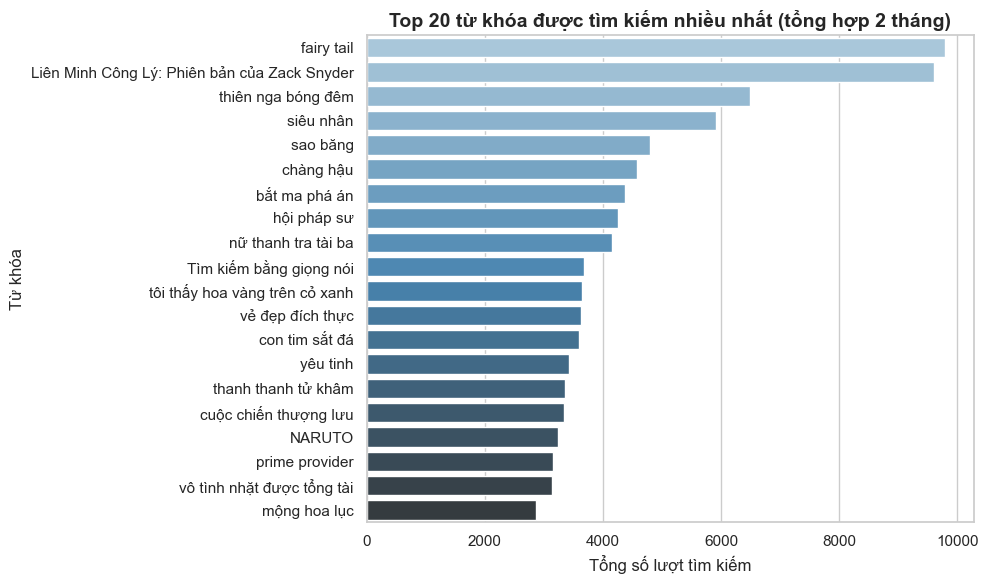

In [ ]:
# ## Phân tích Top 20 từ khóa phổ biến nhất (dựa theo số lượng tìm kiếm thật)
import seaborn as sns
import matplotlib.pyplot as plt

# Loại bỏ giá trị null
df_top1_clean = df_top1.dropna(subset=['keyword'])

# Lấy top 20 keyword theo search_count
top20_real = (
    df_top1_clean
    .groupby('keyword', as_index=False)['search_count']
    .sum()
    .sort_values('search_count', ascending=False)
    .head(20)
   
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top20_real, y='keyword', x='search_count', palette='Blues_d', hue='keyword',
    legend=False,)
plt.title("Top 20 từ khóa được tìm kiếm nhiều nhất (tổng hợp 2 tháng)", fontsize=14, fontweight='bold')
plt.xlabel("Tổng số lượt tìm kiếm", fontsize=12)
plt.ylabel("Từ khóa", fontsize=12)
plt.tight_layout()
savefig("top20_keywords_overall")
plt.show()



##  Heatmap: So sánh tần suất tìm kiếm tháng 6 và tháng 7

### Mục tiêu  
Trực quan hóa **mức độ phổ biến của các từ khóa** giữa hai tháng liên tiếp — **tháng 6 và tháng 7** — nhằm nhận biết:  
- Từ khóa nào **giữ vững sức hút** qua các tháng.  
- Từ khóa nào **tăng/giảm mạnh** về tần suất tìm kiếm.  
- Từ đó giúp **phân tích xu hướng người dùng theo thời gian**.

---

### Cách tính toán  
1. Đếm số lần mỗi từ khóa xuất hiện trong `most_search_t6` và `most_search_t7`.  
2. Gộp kết quả hai tháng vào cùng một bảng.  
3. Lấy **Top 20 từ khóa phổ biến nhất** (có tần suất cao ở ít nhất một trong hai tháng).  
4. Vẽ **heatmap** thể hiện mật độ tìm kiếm của từng từ khóa theo từng tháng. 

✅ Saved chart to: outputs\charts\heatmap_top20_keywords_t6_t7.png


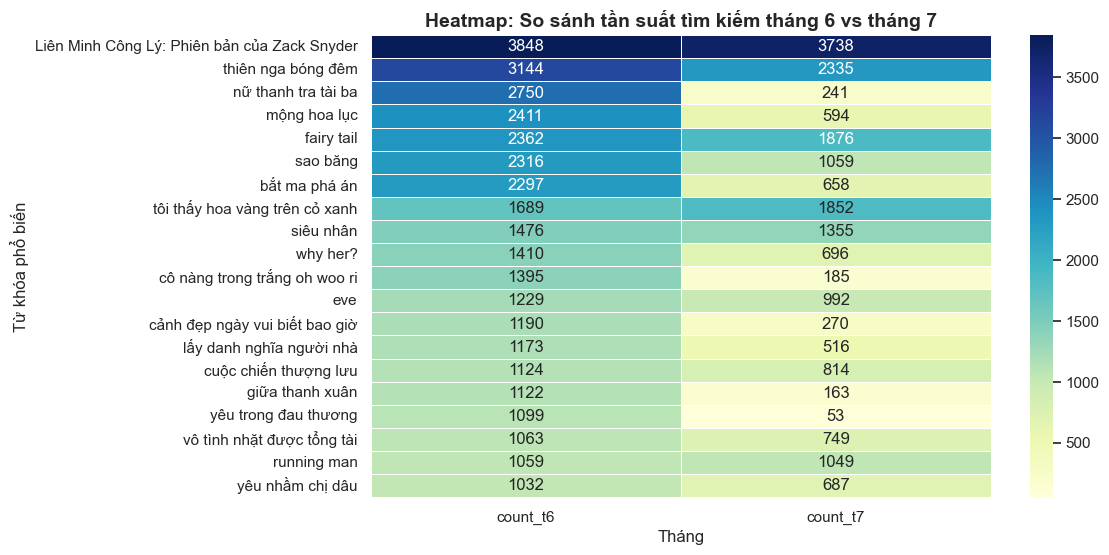

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đếm tần suất xuất hiện của mỗi keyword theo tháng
count_t6 = df_top_month['most_search_t6'].value_counts().reset_index()
count_t6.columns = ['keyword', 'count_t6']

count_t7 = df_top_month['most_search_t7'].value_counts().reset_index()
count_t7.columns = ['keyword', 'count_t7']

# Gộp 2 tháng lại
compare_df = pd.merge(count_t6, count_t7, on='keyword', how='outer').fillna(0)

# Lấy top 20 từ khóa phổ biến nhất trong 2 tháng
top_keywords = compare_df.nlargest(20, ['count_t6', 'count_t7']).set_index('keyword')

# Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    top_keywords,
    annot=True,            # hiển thị số trên ô
    fmt=".0f",
    cmap="YlGnBu",         # bảng màu từ vàng → xanh lam
    linewidths=0.5
)
plt.title("Heatmap: So sánh tần suất tìm kiếm tháng 6 vs tháng 7", fontsize=14, fontweight='bold')
plt.xlabel("Tháng")
plt.ylabel("Từ khóa phổ biến")
savefig("heatmap_top20_keywords_t6_t7")
plt.show()



## So sánh hành vi user: top1 tháng 6 → top1 tháng 7
Ta kiểm tra tỉ lệ user giữ nguyên top1 vs đổi top1.


=== Tỷ lệ giữ nguyên từ khóa top1 giữa tháng 6 và tháng 7 ===
is_same
False    95.218829
True      4.781171
Name: proportion, dtype: float64
✅ Saved chart to: outputs\charts\user_top1_change_ratio.png


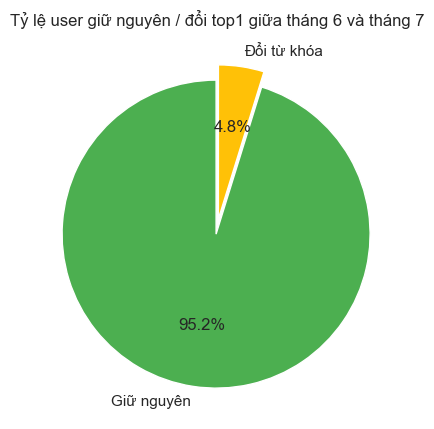

In [33]:
## So sánh hành vi user: top1 tháng 6 → top1 tháng 7

# Lấy ra cặp (user_id, most_search_t6, most_search_t7)
df_compare = df_top_month[['user_id', 'most_search_t6', 'most_search_t7']].dropna(subset=['most_search_t6', 'most_search_t7'])

# Tạo cột mới xác định người dùng có giữ nguyên top1 hay không
df_compare['is_same'] = df_compare['most_search_t6'] == df_compare['most_search_t7']

# Tính tỷ lệ phần trăm
ratio = df_compare['is_same'].value_counts(normalize=True) * 100

print("=== Tỷ lệ giữ nguyên từ khóa top1 giữa tháng 6 và tháng 7 ===")
print(ratio)

# Vẽ biểu đồ tròn thể hiện sự thay đổi hành vi
plt.figure(figsize=(5, 5))
plt.pie(
    ratio,
    labels=['Giữ nguyên', 'Đổi từ khóa'],
    autopct='%.1f%%',
    colors=['#4CAF50', '#FFC107'],
    startangle=90,
    explode=(0.05, 0.05)
)
plt.title("Tỷ lệ user giữ nguyên / đổi top1 giữa tháng 6 và tháng 7")
savefig("user_top1_change_ratio")

plt.show()


##  So sánh xu hướng tìm kiếm tháng 6 và tháng 7

Mục tiêu: phân tích **mức độ thay đổi mức độ phổ biến** của từng từ khóa giữa hai tháng.

###  Cách tính
1. **Bước 1:** Đếm số lần xuất hiện (frequency) của mỗi từ khóa trong từng tháng.  
   → `count_t6` = số lượt tìm kiếm trong tháng 6  
   → `count_t7` = số lượt tìm kiếm trong tháng 7  

2. **Bước 2:** Gộp hai bảng theo `keyword` để dễ so sánh.

3. **Bước 3:** Tính phần trăm thay đổi giữa hai tháng:
   \[
   \text{change\_%} = \frac{(\text{count\_t7} - \text{count\_t6})}{\text{count\_t6}} \times 100
   \]

    Nếu `change_% > 0` → từ khóa **tăng độ phổ biến** (xu hướng lên)  
    Nếu `change_% < 0` → từ khóa **giảm độ phổ biến** (xu hướng xuống)

4. **Bước 4:** Lọc ra **Top 10 từ khóa có tăng trưởng mạnh nhất** để xem người dùng quan tâm gì nhiều hơn ở tháng 7.

---

Kết quả biểu đồ cột cho thấy:
- Thanh dài → tăng mạnh → trending mới nổi trong tháng 7  
- Thanh ngắn hoặc âm → giảm mạnh → trend cũ bị thay thế


C:\Users\DiuNguyen\AppData\Local\Temp\ipykernel_12776\3455105012.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_change, y='keyword', x='change_%', palette='coolwarm')


✅ Saved chart to: outputs\charts\top10_keyword_growth_t6_to_t7.png


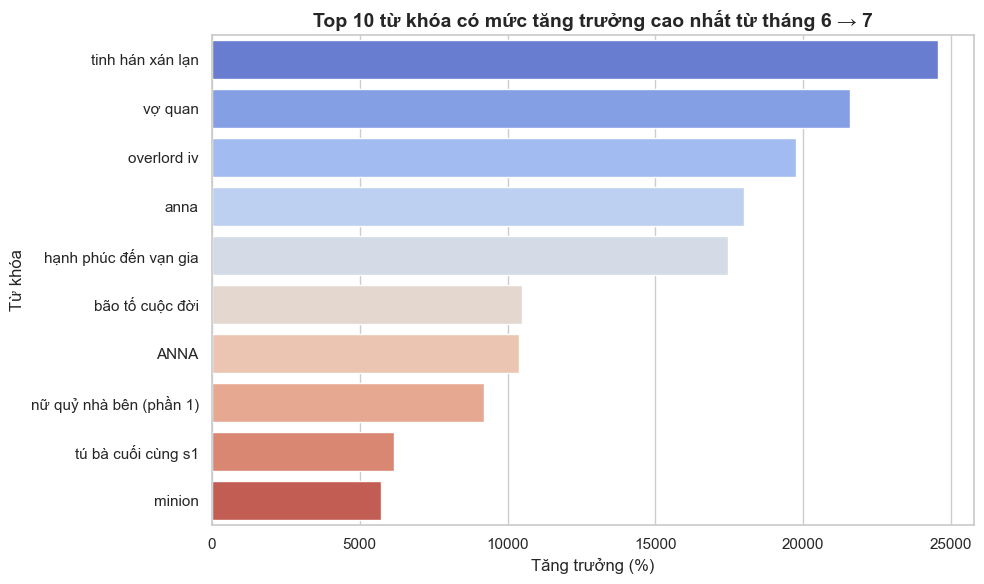

 Nhận xét:
- Biểu đồ trên cho thấy những nội dung mới nổi bật ở tháng 7 so với tháng 6.
- Có thể thấy được xu hướng người dùng chuyển từ thể loại cũ sang phim hoặc chương trình mới.


In [34]:
# ## So sánh tần suất giữa tháng 6 và tháng 7

# Đếm tần suất từng từ khóa ở mỗi tháng
count_t6 = df_top_month['most_search_t6'].value_counts().reset_index()
count_t7 = df_top_month['most_search_t7'].value_counts().reset_index()
count_t6.columns = ['keyword', 'count_t6']
count_t7.columns = ['keyword', 'count_t7']

# Gộp 2 bảng để so sánh
compare_df = pd.merge(count_t6, count_t7, on='keyword', how='outer').fillna(0)

# Tính thay đổi % giữa hai tháng
compare_df['change_%'] = ((compare_df['count_t7'] - compare_df['count_t6']) / 
                           compare_df['count_t6'].replace(0, pd.NA)) * 100

# Lấy top 10 từ khóa có thay đổi mạnh nhất
top_change = compare_df.sort_values(by='change_%', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_change, y='keyword', x='change_%', palette='coolwarm')
plt.title("Top 10 từ khóa có mức tăng trưởng cao nhất từ tháng 6 → 7", fontsize=14, fontweight='bold')
plt.xlabel("Tăng trưởng (%)", fontsize=12)
plt.ylabel("Từ khóa", fontsize=12)
plt.tight_layout()
savefig("top10_keyword_growth_t6_to_t7")
plt.show()


print(" Nhận xét:")
print("- Biểu đồ trên cho thấy những nội dung mới nổi bật ở tháng 7 so với tháng 6.")
print("- Có thể thấy được xu hướng người dùng chuyển từ thể loại cũ sang phim hoặc chương trình mới.")


## Phân tích thể loại trong top 30 từ khóa phổ biến

Ở phần này, ta sử dụng dữ liệu `keyword_classified_top30.csv` — là kết quả **phân loại bằng AI** cho 30 từ khóa được tìm kiếm nhiều nhất.

### Mục tiêu
Xem người dùng đang quan tâm đến **thể loại nội dung nào** (ví dụ: *Reality Show*, *Drama*, *Comedy*, …).

### Cách thực hiện
1. Đếm số lượng từ khóa trong từng thể loại (`value_counts()`).
2. Vẽ biểu đồ cột và biểu đồ tròn để trực quan hóa phân bố.

### Nhận xét
- Nếu `Reality Show` chiếm tỉ lệ lớn → người dùng đang ưa chuộng các chương trình thực tế.  
- Nếu `Drama` hoặc `Comedy` nổi bật → xu hướng xem phim / giải trí nhẹ nhàng đang tăng.  
- Phân tích này có thể giúp đội nội dung đề xuất phim, show hoặc quảng cáo phù hợp hơn với thị hiếu từng giai đoạn.



C:\Users\DiuNguyen\AppData\Local\Temp\ipykernel_12776\696974607.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_counts, y='category', x='count', palette='viridis')


✅ Saved chart to: outputs\charts\keyword_category_distribution_bar.png


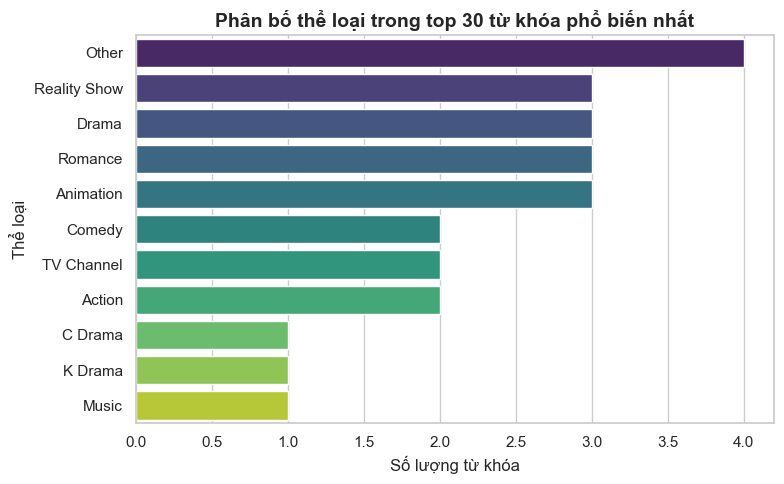

✅ Saved chart to: outputs\charts\keyword_category_distribution.png


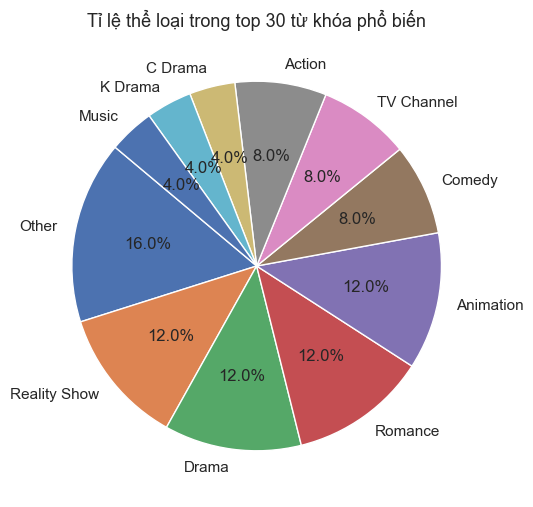

In [36]:
# Đếm số lượng keyword theo từng category
cat_counts = df_classified['category'].value_counts().reset_index()
cat_counts.columns = ['category', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(data=cat_counts, y='category', x='count', palette='viridis')
plt.title("Phân bố thể loại trong top 30 từ khóa phổ biến nhất", fontsize=14, fontweight='bold')
plt.xlabel("Số lượng từ khóa", fontsize=12)
plt.ylabel("Thể loại", fontsize=12)
plt.tight_layout()
savefig("keyword_category_distribution_bar")
plt.show()

# Biểu đồ tròn (pie)
plt.figure(figsize=(6, 6))
plt.pie(cat_counts['count'], labels=cat_counts['category'], autopct='%1.1f%%', startangle=140)
plt.title("Tỉ lệ thể loại trong top 30 từ khóa phổ biến", fontsize=13)
savefig("keyword_category_distribution")
plt.show()

